## Optimization - Polynomial

In [1]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

Original line: C0 = 4.0, C1 = 2.0
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 55.5443227261
            Iterations: 8
            Function evaluations: 59
            Gradient evaluations: 8
Fitted polynomial: C0 = -0.716753146674, C1 = 5.27826309036


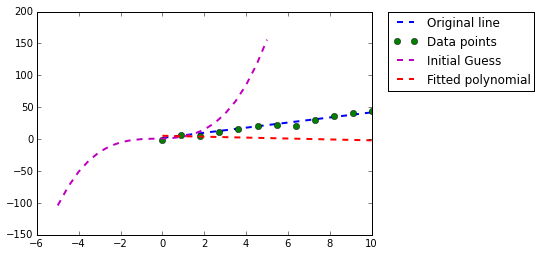

In [2]:
import pandas as pd
import numpy as np
import scipy.optimize as spo
import matplotlib.pyplot as plt
%matplotlib inline 


#def fit_line(data, error_func):
    #l = np.float32([0,np.mean(data[:,1])])
    
    ## Plot initial guess (optional)
    #x_ends = np.float32([-5,5])
    #plt.plot(x_ends, l[0] * x_ends + l[1], 'm--', linewidth=2.0, label="Initial guess")
    ## plt.show()
    
    ## Call optimizer to minimize error function
    #result = spo.minimize(error_func, l, args=(data,), method="SLSQP", options={'disp':True})
    #return result.x

def fit_poly(data, error_func, degree=3):
    # generate initial guess
    Cguess = np.poly1d(np.ones(degree + 1, dtype = np.float32))
    
    # plot initial guess (optional)
    x = np.linspace(-5, 5, 21)
    plt.plot(x, np.polyval(Cguess, x), 'm--', linewidth=2.0, label = "Initial Guess")
    
    # call optimizer to minimize error function
    result = spo.minimize(error_func, Cguess, args = (data,), method = 'SLSQP', options = {'disp':True})
    
    return np.poly1d(result.x)



#def error(line, data):
    #err = np.sum((data[:,1] - (line[0] * data[:,0] + line[1]))**2)
    #return err

def error_poly(C, data):
    # compute error between given polynomial and observed data
    err = np.sum((data[:,1] - np.polyval(C, data[:,0]))**2)
    return err



def run_optimization_polynomial():

    # Define original line
    l_orig = np.float32([4,2])
    print "Original line: C0 = {}, C1 = {}".format(l_orig[0], l_orig[1])
    Xorig = np.linspace(0,10,12)
    Yorig = l_orig[0] * Xorig + l_orig[1]
    plt.plot(Xorig, Yorig, "b--", linewidth=2.0, label="Original line")
    # plt.show()
    
    # Generate noisy data
    noise_sigma = 3.0
    noise = np.random.normal(0,noise_sigma, Yorig.shape)
    data = np.asarray([Xorig, Yorig + noise]).T
    plt.plot(data[:,0], data[:,1], 'go', label = "Data points")
    # plt.show()
    
    ## try to fit a line to this data
    # l_fit = fit_line(data, error)
    # print "Fitted line: C0 = {}, C1 = {}".format(l_fit[0], l_fit[1])
    # plt.plot(data[:,0], l_fit[0] * data[:,0] + l_fit[1], 'r--', linewidth=2.0, label="Fitted line")
    # plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    ## plt.show()
    
    # try to fit a polynomial to this data
    l_fit = fit_poly(data, error_poly)
    print "Fitted polynomial: C0 = {}, C1 = {}".format(l_fit[0], l_fit[1])
    plt.plot(data[:,0], l_fit[0] * data[:,0] + l_fit[1], 'r--', linewidth=2.0, label="Fitted polynomial")
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    # plt.show()
    
    # add legend and show plot

    
if __name__ == "__main__":
    run_optimization_polynomial()